# **PyTorch ResNet MNIST**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)

Mounted at /content/gdrive/


In [ ]:
data = pd.read_csv(
    "/content/gdrive/MyDrive/machine_learning_practice/MNIST/data.csv"
)

In [ ]:
X = data.drop(columns=["label"]).values
y = data["label"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (29400, 784)
y_train shape: (29400,)
X_test shape: (12600, 784)
y_test shape: (12600,)


In [ ]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, X, y, transform=None):
        self.X = torch.tensor(X)
        self.y = torch.tensor(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [ ]:
epochs = 10
batch_size = 64
learning_rate = 0.001

In [ ]:
train_data = Dataset(X_train, y_train)
test_data = Dataset(X_test, y_test)

In [ ]:
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, drop_last=True)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True, drop_last=True)

In [ ]:
ResNet = torchvision.models.resnet18(weights=None)

In [ ]:
ResNet.fc = nn.Sequential(
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
)

In [ ]:
for parameter in ResNet.parameters():
    parameter.requires_grad = True

In [ ]:
ResNet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=ResNet.parameters(), lr=learning_rate)

In [ ]:
loaders = {
    "train": train_dataloader,
    "test": test_dataloader
}

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
ResNet = ResNet.to(device)

In [ ]:
accuracy = {"train": [], "test": []}

for epoch in range(epochs):
    epoch_correct = 0
    epoch_all = 0

    for k, dataloader in loaders.items():
        for X_batch, y_batch in dataloader:
            X_batch = X_batch.to("cuda")
            y_batch = y_batch.to("cuda")
            X_batch = X_batch.type(torch.float32)
            X_batch = X_batch.view(batch_size, 1, 28, 28)
            X_batch = X_batch.repeat(1, 3, 1, 1)

            if k == "train":
                ResNet.train()
                out = ResNet(X_batch)
                loss = criterion(out, y_batch)
                optimizer.zero_grad()  
                loss.backward()
                optimizer.step()
            else:
                ResNet.eval()

                with torch.no_grad():  
                    out = ResNet(X_batch)

            predictions = out.argmax(-1)
            correct = torch.tensor(y_batch[y_batch==predictions].size())
            all = batch_size
            epoch_correct += correct.item()
            epoch_all += all

        if k == "train":
            print(f"Epoch: {epoch+1}")
        print(f"Loader: {k}. Accuracy: {epoch_correct/epoch_all}")
        
        accuracy[k].append(epoch_correct/epoch_all)

Epoch: 1
Loader: train. Accuracy: 0.9436955337690632
Loader: test. Accuracy: 0.9529580152671756
Epoch: 2
Loader: train. Accuracy: 0.975864651416122
Loader: test. Accuracy: 0.9652671755725191
Epoch: 3
Loader: train. Accuracy: 0.9814814814814815
Loader: test. Accuracy: 0.9826335877862595
Epoch: 4
Loader: train. Accuracy: 0.984443082788671
Loader: test. Accuracy: 0.9846135496183206
Epoch: 5
Loader: train. Accuracy: 0.9880174291938998
Loader: test. Accuracy: 0.9863788167938932
Epoch: 6
Loader: train. Accuracy: 0.9874046840958606
Loader: test. Accuracy: 0.9883110687022901
Epoch: 7
Loader: train. Accuracy: 0.988562091503268
Loader: test. Accuracy: 0.9882156488549618
Epoch: 8
Loader: train. Accuracy: 0.9896173747276689
Loader: test. Accuracy: 0.9885019083969465
Epoch: 9
Loader: train. Accuracy: 0.9912513616557734
Loader: test. Accuracy: 0.9902671755725191
Epoch: 10
Loader: train. Accuracy: 0.9918981481481481
Loader: test. Accuracy: 0.9882156488549618


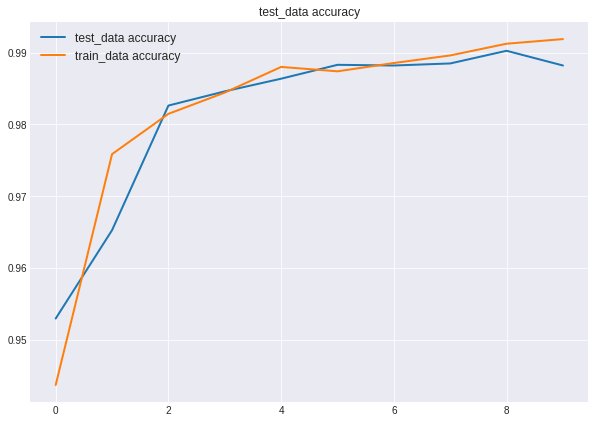

In [ ]:
plt.style.use("seaborn-darkgrid")
plt.figure(figsize=(10, 7))

plt.title("test_data accuracy")
plt.plot(range(epochs), accuracy["test"], linewidth=2, label="test_data accuracy")
plt.plot(range(epochs), accuracy["train"], linewidth=2, label="train_data accuracy")
plt.legend(fontsize=12)
plt.show()

In [ ]:
test_img = X_test[13]
test_label = y_test[13]

ResNet.eval()

test_img_tensor = torch.tensor(test_img)
test_img_tensor = test_img_tensor.to("cuda")
test_img_tensor = test_img_tensor.type(torch.float32)
test_img_tensor = test_img_tensor.view(1, 28, 28)
test_img_tensor = test_img_tensor.repeat(1, 3, 1, 1)

prediction = ResNet(test_img_tensor).argmax(-1)[0]

label: 2
prediction: 2


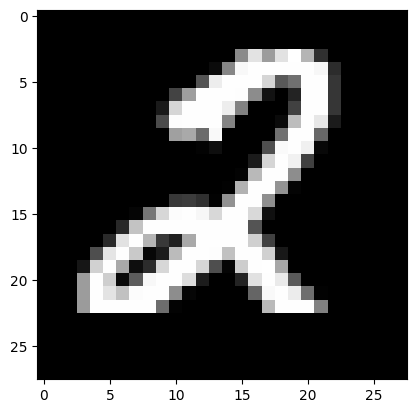

In [ ]:
print(f"label: {test_label}")
print(f"prediction: {prediction}")

plt.style.use("default")
plt.gray()

current_image = test_img.reshape((28, 28))
plt.imshow(current_image)

plt.show()